In [1]:
import pandas as pd

data=pd.read_csv("englishmodel.csv")
data.head()

,text,sentiment
0,Great cooler.. excellent air flow and for this...,Positive
1,Best budget 2 fit cooler. Nice cooling,Positive
2,The quality is good but the power of air is de...,Neutral
3,Very bad product it's a only a fan,Negative
4,Ok ok product,Neutral


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213359 entries, 0 to 213358
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       212501 non-null  object
 1   sentiment  213359 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [3]:
data.describe()

,text,sentiment
count,212501,213359
unique,120975,7
top,Good,Positive
freq,14175,166555


In [4]:
#Check Null Values
data.isnull().any()

text          True
sentiment    False
dtype: bool

In [5]:
# Assuming you want to remove rows only if 'text' column has null values
data = data.dropna(subset=['text'])


In [6]:
data.describe()

,text,sentiment
count,212501,212501
unique,120975,7
top,Good,Positive
freq,14175,165783


In [7]:
pip install Image

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


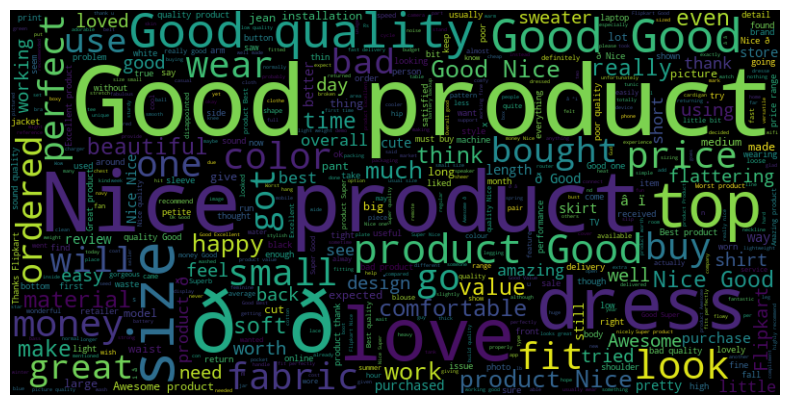

In [9]:
#Data Visualization Before Preprocessing
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df=' '.join(data['text'].tolist())

stopwords=set(STOPWORDS)
stopwords.update(['https','co','RT','...','amp'])

wc=WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(df)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

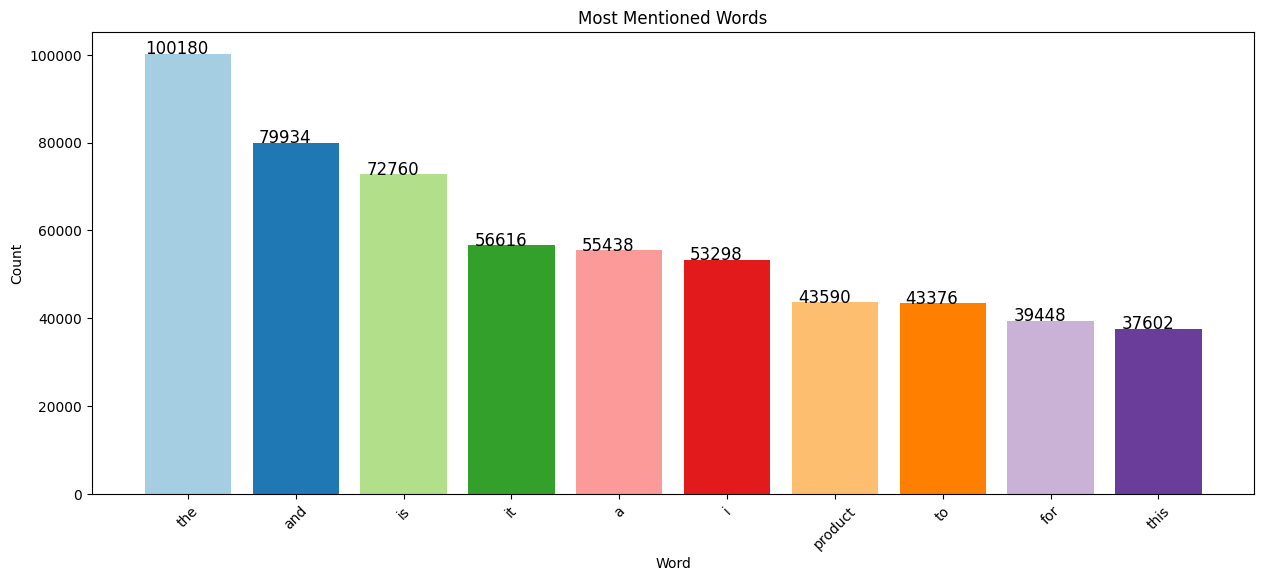

In [10]:
#Data Visualization Before Preprocessing
import matplotlib.pyplot as plt
from collections import Counter

text=" ".join(data["text"])
tokens = text.split()
word_counts= Counter(tokens)

top_words= word_counts.most_common(10)
word, count= zip(*top_words)

colors= plt.cm.Paired(range(len(word)))

plt.figure(figsize=(15, 6))
bars=plt.bar(word, count, color=colors)
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Most Mentioned Words")
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x()+ bar.get_width()/ 2 - 0.1, num + 1, str(num), fontsize=12, color="black", ha="center")

plt.show()

In [11]:
#DATA PREPROCESSING
df= pd.DataFrame(data[['text','sentiment']])
df.head(5)

,text,sentiment
0,Great cooler.. excellent air flow and for this...,Positive
1,Best budget 2 fit cooler. Nice cooling,Positive
2,The quality is good but the power of air is de...,Neutral
3,Very bad product it's a only a fan,Negative
4,Ok ok product,Neutral


In [12]:
df.to_csv('englishmodel_cutcol.csv', index=False)

In [13]:
#CLEANING
data=pd.read_csv('englishmodel_cutcol.csv')
data.head(5)

,text,sentiment
0,Great cooler.. excellent air flow and for this...,Positive
1,Best budget 2 fit cooler. Nice cooling,Positive
2,The quality is good but the power of air is de...,Neutral
3,Very bad product it's a only a fan,Negative
4,Ok ok product,Neutral


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212501 entries, 0 to 212500
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       212501 non-null  object
 1   sentiment  212501 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [15]:
#remove duplicate data entries
data.drop_duplicates(subset="text", keep='first', inplace=True)

In [16]:
data.info() #to check have duplicates or not

<class 'pandas.core.frame.DataFrame'>
Index: 120975 entries, 0 to 212500
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       120975 non-null  object
 1   sentiment  120975 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB


In [17]:
df= pd.DataFrame(data[['text','sentiment']])
df.head(10)

,text,sentiment
0,Great cooler.. excellent air flow and for this...,Positive
1,Best budget 2 fit cooler. Nice cooling,Positive
2,The quality is good but the power of air is de...,Neutral
3,Very bad product it's a only a fan,Negative
4,Ok ok product,Neutral
5,The cooler is really fantastic and provides go...,Positive
6,Very good product,Positive
7,Very nice,Neutral
8,Very bad cooler,Negative
9,Very good,Positive


In [18]:
import re 
import string
import nltk

def remove_URL(tweet):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',tweet)

def remove_mention(tweet):
    return re.sub(r'@\w+', '', tweet)

def remove_html(tweet):
    html=re.compile(r'<.*?>')
    return html.sub(r'',tweet)

def remove_emoji(tweet):
    emoji_pattern=re.compile("["
                             u"\U0001F600-\U0001F64F"
                             u"\U0001F300-\U0001F5FF"
                             u"\U0001F680-\U0001F6FF"
                             u"\U0001F1E0-\U0001F1FF"
                                                 "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',tweet)

def remove_numbers(tweet):
    tweet= re.sub(r'\d+','',tweet)
    return tweet

def remove_symbols(tweet):
    tweet= re.sub(r'[^a-zA-Z0-9\s]', '',tweet) #Eliminate all symbol
    return tweet

df['cleaning']= df['text'].apply(lambda x: remove_URL(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_mention(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5)

,text,sentiment,cleaning
0,Great cooler.. excellent air flow and for this...,Positive,Great cooler excellent air flow and for this p...
1,Best budget 2 fit cooler. Nice cooling,Positive,Best budget fit cooler Nice cooling
2,The quality is good but the power of air is de...,Neutral,The quality is good but the power of air is de...
3,Very bad product it's a only a fan,Negative,Very bad product its a only a fan
4,Ok ok product,Neutral,Ok ok product


In [19]:
#CASE FOLDING
def case_folding(text):
    if isinstance(text, str):
        lowercase_text=text.lower()
        return lowercase_text
    else:
        return text

df['case_folding']=df['cleaning'].apply(case_folding)
df.head(5)

,text,sentiment,cleaning,case_folding
0,Great cooler.. excellent air flow and for this...,Positive,Great cooler excellent air flow and for this p...,great cooler excellent air flow and for this p...
1,Best budget 2 fit cooler. Nice cooling,Positive,Best budget fit cooler Nice cooling,best budget fit cooler nice cooling
2,The quality is good but the power of air is de...,Neutral,The quality is good but the power of air is de...,the quality is good but the power of air is de...
3,Very bad product it's a only a fan,Negative,Very bad product its a only a fan,very bad product its a only a fan
4,Ok ok product,Neutral,Ok ok product,ok ok product


In [20]:
#TOKENIZATION
def tokenize(text):
    tokens=text.split()
    return tokens

df['tokenize']=df['case_folding'].apply(tokenize)
df.head(5)

,text,sentiment,cleaning,case_folding,tokenize
0,Great cooler.. excellent air flow and for this...,Positive,Great cooler excellent air flow and for this p...,great cooler excellent air flow and for this p...,"[great, cooler, excellent, air, flow, and, for..."
1,Best budget 2 fit cooler. Nice cooling,Positive,Best budget fit cooler Nice cooling,best budget fit cooler nice cooling,"[best, budget, fit, cooler, nice, cooling]"
2,The quality is good but the power of air is de...,Neutral,The quality is good but the power of air is de...,the quality is good but the power of air is de...,"[the, quality, is, good, but, the, power, of, ..."
3,Very bad product it's a only a fan,Negative,Very bad product its a only a fan,very bad product its a only a fan,"[very, bad, product, its, a, only, a, fan]"
4,Ok ok product,Neutral,Ok ok product,ok ok product,"[ok, ok, product]"


In [21]:
#FILTERING/STOPWORD REMOVAL
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_id=stopwords.words('indonesian')
stop_words_en=stopwords.words('english')#option

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [22]:
# Combine the stopwords lists
combined_stop_words = set(stop_words_id + stop_words_en)

def remove_stopwords(text):
    return[word for word in text if word not in combined_stop_words]
    
df['StopWord Removal']=df['tokenize'].apply(lambda x:remove_stopwords(x))
df.head(5)

,text,sentiment,cleaning,case_folding,tokenize,StopWord Removal
0,Great cooler.. excellent air flow and for this...,Positive,Great cooler excellent air flow and for this p...,great cooler excellent air flow and for this p...,"[great, cooler, excellent, air, flow, and, for...","[great, cooler, excellent, air, flow, price, a..."
1,Best budget 2 fit cooler. Nice cooling,Positive,Best budget fit cooler Nice cooling,best budget fit cooler nice cooling,"[best, budget, fit, cooler, nice, cooling]","[best, budget, fit, cooler, nice, cooling]"
2,The quality is good but the power of air is de...,Neutral,The quality is good but the power of air is de...,the quality is good but the power of air is de...,"[the, quality, is, good, but, the, power, of, ...","[quality, good, power, air, decent]"
3,Very bad product it's a only a fan,Negative,Very bad product its a only a fan,very bad product its a only a fan,"[very, bad, product, its, a, only, a, fan]","[bad, product, fan]"
4,Ok ok product,Neutral,Ok ok product,ok ok product,"[ok, ok, product]","[ok, ok, product]"


In [23]:
!pip install Sastrawi

In [24]:
#STEMMING
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
factory=StemmerFactory()
stemmer=factory.create_stemmer()

def stem_text(text):
    return[stemmer.stem(word) for word in text]

df['stemming_data']= df['StopWord Removal'].apply(lambda x: ' '.join(stem_text(x)))

df.head(5)

,text,sentiment,cleaning,case_folding,tokenize,StopWord Removal,stemming_data
0,Great cooler.. excellent air flow and for this...,Positive,Great cooler excellent air flow and for this p...,great cooler excellent air flow and for this p...,"[great, cooler, excellent, air, flow, and, for...","[great, cooler, excellent, air, flow, price, a...",great cooler excellent air flow price amazing ...
1,Best budget 2 fit cooler. Nice cooling,Positive,Best budget fit cooler Nice cooling,best budget fit cooler nice cooling,"[best, budget, fit, cooler, nice, cooling]","[best, budget, fit, cooler, nice, cooling]",best budget fit cooler nice cooling
2,The quality is good but the power of air is de...,Neutral,The quality is good but the power of air is de...,the quality is good but the power of air is de...,"[the, quality, is, good, but, the, power, of, ...","[quality, good, power, air, decent]",quality good power air decent
3,Very bad product it's a only a fan,Negative,Very bad product its a only a fan,very bad product its a only a fan,"[very, bad, product, its, a, only, a, fan]","[bad, product, fan]",bad product fan
4,Ok ok product,Neutral,Ok ok product,ok ok product,"[ok, ok, product]","[ok, ok, product]",ok ok product


In [25]:
#Normalization
def text_normalization(text):
    normalized_text=text
    return normalized_text

df['normalized_text']=df['stemming_data'].apply(text_normalization)
df.head(50)

,text,sentiment,cleaning,case_folding,tokenize,StopWord Removal,stemming_data,normalized_text
0,Great cooler.. excellent air flow and for this...,Positive,Great cooler excellent air flow and for this p...,great cooler excellent air flow and for this p...,"[great, cooler, excellent, air, flow, and, for...","[great, cooler, excellent, air, flow, price, a...",great cooler excellent air flow price amazing ...,great cooler excellent air flow price amazing ...
1,Best budget 2 fit cooler. Nice cooling,Positive,Best budget fit cooler Nice cooling,best budget fit cooler nice cooling,"[best, budget, fit, cooler, nice, cooling]","[best, budget, fit, cooler, nice, cooling]",best budget fit cooler nice cooling,best budget fit cooler nice cooling
2,The quality is good but the power of air is de...,Neutral,The quality is good but the power of air is de...,the quality is good but the power of air is de...,"[the, quality, is, good, but, the, power, of, ...","[quality, good, power, air, decent]",quality good power air decent,quality good power air decent
3,Very bad product it's a only a fan,Negative,Very bad product its a only a fan,very bad product its a only a fan,"[very, bad, product, its, a, only, a, fan]","[bad, product, fan]",bad product fan,bad product fan
4,Ok ok product,Neutral,Ok ok product,ok ok product,"[ok, ok, product]","[ok, ok, product]",ok ok product,ok ok product
5,The cooler is really fantastic and provides go...,Positive,The cooler is really fantastic and provides go...,the cooler is really fantastic and provides go...,"[the, cooler, is, really, fantastic, and, prov...","[cooler, really, fantastic, provides, good, ai...",cooler really fantastic provides good air flow...,cooler really fantastic provides good air flow...
6,Very good product,Positive,Very good product,very good product,"[very, good, product]","[good, product]",good product,good product
7,Very nice,Neutral,Very nice,very nice,"[very, nice]",[nice],nice,nice
8,Very bad cooler,Negative,Very bad cooler,very bad cooler,"[very, bad, cooler]","[bad, cooler]",bad cooler,bad cooler
9,Very good,Positive,Very good,very good,"[very, good]",[good],good,good


In [26]:
#EXPORT TO CSV
df.to_csv('englishmodel_cleaned.csv', encoding='utf8', index=False)

In [27]:
#VISUALIZATION AFTER PREPROCESSING
df=pd.read_csv('englishmodel_cleaned.csv')
df.tail(5)

,text,sentiment,cleaning,case_folding,tokenize,StopWord Removal,stemming_data,normalized_text
120970,I was very happy to snag this dress at such a ...,Positive,I was very happy to snag this dress at such a ...,i was very happy to snag this dress at such a ...,"['i', 'was', 'very', 'happy', 'to', 'snag', 't...","['happy', 'snag', 'dress', 'great', 'price', '...",happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...
120971,"It reminds me of maternity clothes. soft, stre...",Neutral,It reminds me of maternity clothes soft stretc...,it reminds me of maternity clothes soft stretc...,"['it', 'reminds', 'me', 'of', 'maternity', 'cl...","['reminds', 'maternity', 'clothes', 'soft', 's...",reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...
120972,"This fit well, but the top was very see throug...",Neutral,This fit well but the top was very see through...,this fit well but the top was very see through...,"['this', 'fit', 'well', 'but', 'the', 'top', '...","['fit', 'well', 'top', 'see', 'never', 'would'...",fit well top see never would worked im glad ab...,fit well top see never would worked im glad ab...
120973,I bought this dress for a wedding i have this ...,Neutral,I bought this dress for a wedding i have this ...,i bought this dress for a wedding i have this ...,"['i', 'bought', 'this', 'dress', 'for', 'a', '...","['bought', 'dress', 'wedding', 'summer', 'cute...",bought dress wedding summer cute unfortunately...,bought dress wedding summer cute unfortunately...
120974,This dress in a lovely platinum is feminine an...,Positive,This dress in a lovely platinum is feminine an...,this dress in a lovely platinum is feminine an...,"['this', 'dress', 'in', 'a', 'lovely', 'platin...","['dress', 'lovely', 'platinum', 'feminine', 'f...",dress lovely platinum feminine fits perfectly ...,dress lovely platinum feminine fits perfectly ...


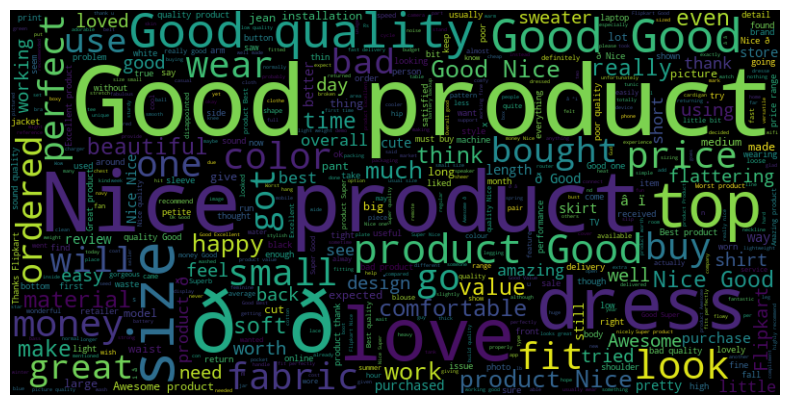

In [28]:
#VISUALIZATION AFTER PREPROCESSING
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text=' '.join(df['normalized_text'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))

wordcloud=WordCloud(width=800,height=400, background_color='black').generate(text)


plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

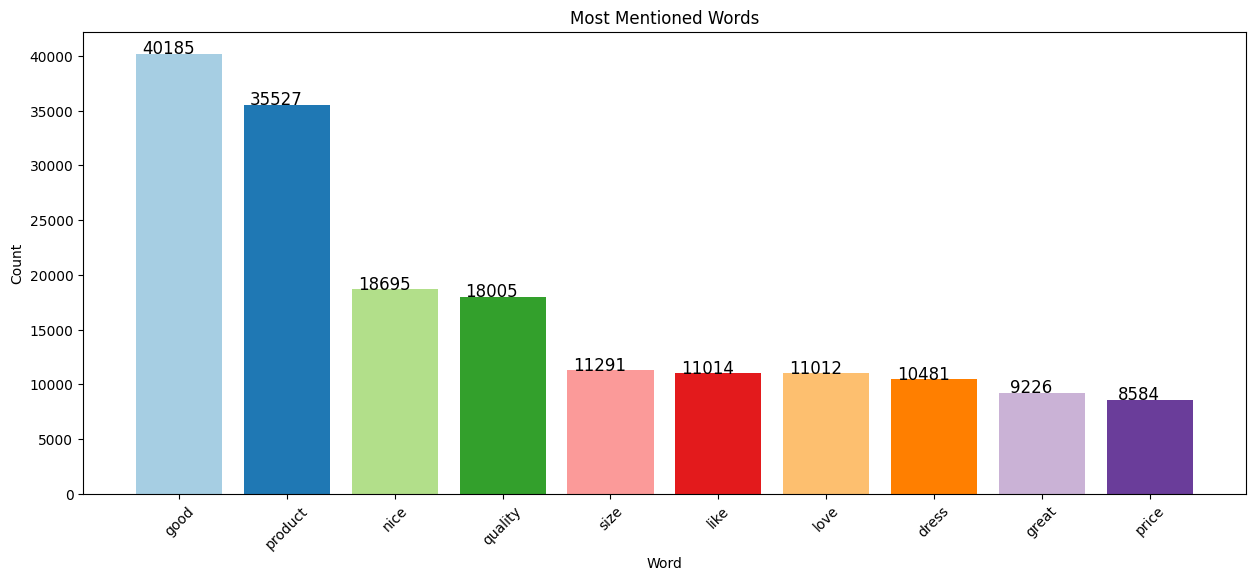

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

text=" ".join(df["normalized_text"].apply(lambda x:str(x) if isinstance(x, (str,int, float)) else ''))
tokens = text.split()
word_counts= Counter(tokens)

top_words= word_counts.most_common(10)
word, count= zip(*top_words)

colors= plt.cm.Paired(range(len(word)))

plt.figure(figsize=(15, 6))
bars=plt.bar(word, count, color=colors)
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Most Mentioned Words")
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x()+ bar.get_width()/ 2 - 0.1, num + 1, str(num), fontsize=12, color="black", ha="center")

plt.show()